# WORKING

## Reading data from cleaned

```
TODO Manca muriel t_006 and t_008
Bisogna pulire ulteriormente i dati perchè il lavoro sembra non essere stato fatto bene (PI potrebbe impattare, I impatta, NI non impatta, R risolvibile, NR non risolvibile):
    - 3 PI | NR
    - 5 I | R
    - 7 I | R (la joint va fixata sul tricipite ma viene misinterpretata come una mano)
    - 8 I | R
    - 9 I | R (potrebbe essere complicato)
    - 13 PI ? | R : è ruotato di 45 gradi e potrebbe overfittare sul disallineamento trovando correlazione spuria per le etichette dei movimenti bassi del corpo (cora t_0028_3)
    - 14 stesso di 13 e sempre movimenti di gambe
    - 17 NI | R testa disallineata
    - 18 come 17 e potrebbe essere utile mappare la camminata come non OoM in entrambe le direzioni, ora son riuscito solo a farlo andare da sinistra a destra e ruotato come in direzione entrante
    - 19/20/21/22/23/24/25/26/27/28/29/30/31 come 17
    - da 25 i dispari sono specchiati e dovrebbero essere girati frontali
    - 27 I | R due joints nelle ginocchia e la spalla sinistra vanno fuori, ci vuole una constraint che faccia da interpolazione sulla distanza dalle due adiacenti
    - 33 I | R (?) ginocchio e pezzi di braccia volano via
    - 34 I | R gomito da lontano si riavvicina
    - 35 I | Difficilmente risolvibile, molto complesso... vanno via un sacco di cose

[ Probabilmente la strada migliore consiste nel prendere il 97.5% della coda destra di velocità e accelerazione per gran parte di questi e sostituire con la media di velocità e accelerazione le giunture limitrofe a quelle che stanno sopra la soglia
Ma bisogna prima metterle su dei grafici per controllare di non star tagliando fuori parti importanti 
Alternativa è riposizionare le anomalie con la regola 97.5% (o più) e calcolare le velocità in un secondo momento ] TODO se c'è tempo
```

In [6]:
import pandas as pd

DATA_POSITION_PATH = "data/position/"
DATA_DERIVATED_PATH = "data/derivated/"
MURIEL_POS = DATA_POSITION_PATH+"muriel/"
MARIANNE_POS = DATA_POSITION_PATH+"marianne/"
CORA_POS = DATA_POSITION_PATH+"cora/"
JUL_SEV_POS = DATA_POSITION_PATH+"07-07/"
JUL_EI_POS = DATA_POSITION_PATH+"07-08/"
JUL_THI_POS = DATA_POSITION_PATH+"07-13/"

# mappings are index -> (file_path, start_end_segment_tuple) in seconds
# TODO movements directions must be set consistently but in trials 1 -> 24 are in a way, while 25 to 36 are flipped, must set everything frontal
# TODO distibution of position should be normalized (maybe)
drivePosMap = { 1:  (MURIEL_POS+"t_003_finalclean.tsv",(37,40.5)),        
                2:  (MURIEL_POS+"t_003_finalclean.tsv",(58,64)),        
                3:  (MURIEL_POS+"t_003_finalclean.tsv",(73,76)),
                4:  (MURIEL_POS+"t_004_finalclean.tsv",(13,16)),
                5:  (MARIANNE_POS+"t_002_finalclean.tsv",(36.3,41.5)),
                6:  (MARIANNE_POS+"t_002_finalclean.tsv",(44.4,50)),
                7:  (MARIANNE_POS+"t_003_finalclean.tsv",(3,8.9)),
                8:  (MARIANNE_POS+"t_005_finalclean.tsv",(4,9)),
                9:  (MARIANNE_POS+"t_005_finalclean.tsv",(9.2,13.4)),
                10: (MARIANNE_POS+"t_012_finalclean.tsv",(14,20.1)),
                11: (CORA_POS+"t_028_finalclean.tsv",(4.7,8.3)),
                12: (CORA_POS+"t_028_finalclean.tsv",(12.8,18.5)),
                13: (CORA_POS+"t_028_finalclean.tsv",(24.2,29.7)),
                14: (CORA_POS+"t_028_finalclean.tsv",(29.8,36.2)),
                15: (CORA_POS+"t_028_finalclean.tsv",(51.1,55)),
                16: (CORA_POS+"t_028_finalclean.tsv",(57.9,63.8)),
                17: (JUL_SEV_POS+"t_051_finalclean.tsv",(16.9,18.7)),
                18: (JUL_SEV_POS+"t_052_finalclean.tsv",(11.5,13.2)),
                19: (JUL_SEV_POS+"t_052_finalclean.tsv",(15,18)),
                20: (JUL_SEV_POS+"t_052_finalclean.tsv",(19,21.5)),
                21: (JUL_SEV_POS+"t_060_finalclean.tsv",(2.6,5)),
                22: (JUL_SEV_POS+"t_061_finalclean.tsv",(58,61)),
                23: (JUL_SEV_POS+"t_063_finalclean.tsv",(25.5,28.5)),
                24: (JUL_SEV_POS+"t_064_finalclean.tsv",(2.5,5.5)),
                
                # TODO all these following have a problem with the head position and many with some joints going crazy
                # A_B trials maybe should be turned in front instead of on a side for consistency
                25: (JUL_EI_POS+"t_052_A_finalclean.tsv",(8.1,11.8)),       # ball catch left side
                26: (JUL_EI_POS+"t_052_B_finalclean.tsv",(11.8,15.1)),      # ball catch right side
                27: (JUL_EI_POS+"t_052_A_finalclean.tsv",(12.15,14.7)),     # ball throw left side
                28: (JUL_EI_POS+"t_052_B_finalclean.tsv",(8.5,11.8)),       # ball throw right side
                29: (JUL_EI_POS+"t_053_A_finalclean.tsv",(22,24.5)),        # ball high throw left side
                30: (JUL_EI_POS+"t_053_B_finalclean.tsv",(22,24.5)),        # ball side catch right side
                31: (JUL_EI_POS+"t_053_A_finalclean.tsv",(25,27.2)),        # ball throw left side
                32: (JUL_EI_POS+"t_053_B_finalclean.tsv",(25,27.2)),        # ball catch right side
                33: (JUL_THI_POS+"t_061_A_finalclean.tsv",(29,32.1)),       # ball throw cheat left side
                34: (JUL_THI_POS+"t_061_B_finalclean.tsv",(29,32.1)),       # ball catch right side TODO error in joint 
                35: (JUL_THI_POS+"t_061_A_finalclean.tsv",(74,80)),         # right ball catch left side TODO many joints going crazy
                36: (JUL_THI_POS+"t_061_B_finalclean.tsv",(74,80))          # ball catch right side
              }

picked = 17

data = drivePosMap[picked]
table = pd.read_table(data[0])
table.head()

,Time,left_foot_X,left_foot_Y,left_foot_Z,right_foot_X,right_foot_Y,right_foot_Z,left_ankle_X,left_ankle_Y,left_ankle_Z,...,left_shoulder_Z,shoulder_center_X,shoulder_center_Y,shoulder_center_Z,right_shoulder_X,right_shoulder_Y,right_shoulder_Z,head_X,head_Y,head_Z
0,0.00,2.273222,1.074582,0.030482,1.982329,1.076584,0.027938,2.297994,1.162659,0.061926,...,1.464714,2.119070,1.053657,1.460774,2.000978,1.050235,1.456835,1.440013,0.651728,1.092435
1,0.01,2.273226,1.074575,0.030479,1.982332,1.076585,0.027933,2.297996,1.162670,0.061897,...,1.464718,2.119092,1.053635,1.460769,2.000978,1.050193,1.456820,1.439909,0.651643,1.092407
2,0.02,2.273231,1.074567,0.030477,1.982335,1.076584,0.027929,2.297999,1.162679,0.061870,...,1.464722,2.119113,1.053613,1.460763,2.000979,1.050154,1.456803,1.439806,0.651558,1.092379
3,0.03,2.273236,1.074557,0.030476,1.982339,1.076580,0.027924,2.298002,1.162688,0.061844,...,1.464724,2.119133,1.053591,1.460755,2.000980,1.050121,1.456786,1.439708,0.651478,1.092353
4,0.04,2.273242,1.074545,0.030478,1.982344,1.076574,0.027918,2.298008,1.162695,0.061821,...,1.464723,2.119150,1.053571,1.460745,2.000981,1.050095,1.456768,1.439623,0.651405,1.092332


In [7]:
startEndSeconds = data[1]
posTable = table[table["Time"].between(startEndSeconds[0],startEndSeconds[1])].iloc[:,1:]
    

#posTableX = posTable.iloc[:,::3]
#posTableY = posTable.iloc[:,1::3]
#posTableZ = posTable.iloc[:,2::3]
if 1 <= picked <= 10:
    posTableY = posTable.iloc[:,::3]
    posTableZ = posTable.iloc[:,1::3]
    posTableX = posTable.iloc[:,2::3]
elif 11 <= picked <= 16:
    posTableX = posTable.iloc[:,::3]
    posTableZ = posTable.iloc[:,1::3]
    posTableY = posTable.iloc[:,2::3]
elif (17 <= picked <= 20 and picked != 19) or picked >= 25:
    posTableY = posTable.iloc[:,::3]
    posTableX = posTable.iloc[:,1::3]
    posTableZ = posTable.iloc[:,2::3]
else:
    posTableX = posTable.iloc[:,::3]
    posTableY = posTable.iloc[:,1::3]
    posTableZ = posTable.iloc[:,2::3]

posTableX = posTableX.rename(columns=dict(zip(list(posTableX),[name.replace('Z','X').replace('Y','X') for name in list(posTableX)])))
posTableY = posTableY.rename(columns=dict(zip(list(posTableY),[name.replace('Z','Y').replace('X','Y') for name in list(posTableY)])))
posTableZ = posTableZ.rename(columns=dict(zip(list(posTableZ),[name.replace('X','Z').replace('Y','Z') for name in list(posTableZ)])))

#theta = np.pi/2  # 90 degrees in radians
#R = np.array([[np.cos(theta), -np.sin(theta), 0],
#              [np.sin(theta), np.cos(theta), 0],
#              [0, 0, 1]])

#for i in range(len(tableX)):
#    # Apply the rotation matrix to the data
#    data_st = np.vstack([tableX.iloc[i,:], tableY.iloc[i,:], tableZ.iloc[i,:]])
#    data_rotated = np.dot(data_st, R)
#    tableX[i,:]=data_rotated[0,:]
#    tableY[i,:]=data_rotated[1,:]
#    tableZ[i,:]=data_rotated[2,:]    
#tableX = data_rotated[:,0]
#tableY = data_rotated[:,1]
#tableZ = data_rotated[:,2]

In [9]:
from matplotlib import pyplot as plt
%matplotlib
from matplotlib.widgets import Slider
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


plt.close("all")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


minMax = np.zeros((2,3))
minMax[0,:] = [posTableX.values.min(),posTableY.values.min(),posTableZ.values.min()]
minMax[1,:] = [posTableX.values.max(),posTableY.values.max(),posTableZ.values.max()]

print(minMax)

# Set appropriate axis limits
ax.set_xlim([minMax[0,0],minMax[1,0]])
ax.set_ylim([minMax[0,1],minMax[1,1]])
ax.set_zlim([minMax[0,2],minMax[1,2]])

# Set the window title
fig.canvas.manager.window.title("3D Movement\t(Scroll with mouse wheel)")

# Set the initial time index
time_index = 0

# Function to update the plot based on the slider value
def update_plot(val):
    ax.cla()  # Clear the previous plot
    
    # Filter the data based on the current time index
    filteredX = posTableX.iloc[val]
    filteredY = posTableY.iloc[val]
    filteredZ = posTableZ.iloc[val]
    
    ax.scatter(filteredX,filteredY,filteredZ)

    ax.set_xlim([minMax[0,0],minMax[1,0]])
    ax.set_ylim([minMax[0,1],minMax[1,1]])
    ax.set_zlim([minMax[0,2],minMax[1,2]])
    
    ax.set_xlabel('X', fontsize=12)
    ax.set_ylabel('Y', fontsize=12)
    ax.set_zlabel('Z', fontsize=12)
    ax.set_title("Movement "+str(picked))

    fig.canvas.draw_idle()

# Create a slider widget
slider_ax = plt.axes([0.2, 0.03, 0.6, 0.03])
maxValue = posTable.shape[0]-1
slider = Slider(slider_ax, 'TimeIndex:', 0, maxValue, valinit=time_index, valstep=1)


# Define a function to update the slider value with the mouse wheel
def on_scroll(event):
    if event.button == 'down':
        if slider.val + slider.valstep*5 <= maxValue:
            slider.set_val(slider.val + slider.valstep*2)
    elif event.button == 'up':
        if slider.val - slider.valstep*10 >= 0:
            slider.set_val(slider.val - slider.valstep*2)
        

# Connect the mouse wheel event to the function
fig.canvas.mpl_connect('scroll_event', on_scroll)


# Register the update_plot function with the slider widget
slider.on_changed(update_plot)

# Initial plot
update_plot(time_index)

# Show the plot
plt.show()


Using matplotlib backend: TkAgg
[[0.58314739 1.22206913 0.02569992]
 [1.35782659 2.4458496  1.6397629 ]]


In [147]:
plt.close('all')

### Proviamo a creare statistiche di velocità per ogni sample

In [10]:
import pandas as pd

lenghts = []
for i in range(1,37):
    table = pd.read_table(drivePosMap[i][0])
    lenghts.append(len(table[table['Time'].between(drivePosMap[i][1][0],drivePosMap[i][1][1])]))
print(lenghts)
print(max(lenghts),min(lenghts),sum(lenghts)/len(lenghts))

[337, 577, 289, 301, 521, 561, 591, 501, 421, 611, 361, 571, 551, 641, 391, 591, 181, 171, 301, 251, 241, 301, 301, 301, 371, 331, 256, 331, 251, 251, 221, 221, 311, 311, 601, 601]
641 171 386.69444444444446


In [ ]:
# Maybe One-Hot-Encoding on nodes is better
#labels = ['Lfoot-Lankle',
#          'Rfoot-Rankle',
#          'Lankle-Lknee',
#          'Rankle-Rknee',
#          'Lknee-Lhip',
#          'Rknee-Rhip',
#          'Lhip-Chip',
#          'Rhip-Chip',
#          'Chip-spine',
#          'spine-Cshoulder',
#          'Lhand-Lwrist',
#          'Rhand-Rwrist',
#          'Lwrist-Lelbow',
#          'Rwrist-Relbow',
#          'Lelbow-Lshoulder',
#          'Relbow-Rshoulder',
#          'Lshoulder-Cshoulder',
#          'Rshoulder-Cshoulder',
#          'Cshoulder-head']


## Calculating Angular Momentum

In [148]:
jointNames = [  'left_foot',
                'right_foot',
                'left_ankle',
                'right_ankle',
                'left_knee',
                'right_knee',
                'left_hip',
                'hip_center',
                'right_hip', 
                'spine',
                'left_hand',
                'right_hand',
                'left_wrist',
                'right_wrist',
                'left_elbow',
                'right_elbow',
                'left_shoulder',
                'shoulder_center',
                'right_shoulder',
                'head'  ]

In [149]:
m_lfoot = 0.0145;m_rfoot = 0.0145;m_lank = 0.0465;m_rank = 0.0465
m_lknee = 0.1;m_rknee = 0.1;m_lhip = 0.1;m_hipc = 0.139;m_rhip = 0.1
m_spine = 0.216;m_lhand = 0.006;m_rhand = 0.006;m_lwrist = 0.016;m_rwrist = 0.016
m_lelb = 0.028;m_relb = 0.028;m_lsho = 0.0158;m_shoc = 0.081;m_rsho = 0.0158;m_head = 0.081

mass = [m_lfoot,
        m_rfoot, 
        m_lank,
        m_rank,
        m_lknee, 
        m_rknee, 
        m_lhip,
        m_hipc,
        m_rhip,
        m_spine,
        m_lhand,
        m_rhand,
        m_lwrist,
        m_rwrist,
        m_lelb,
        m_relb,
        m_lsho,
        m_shoc,
        m_rsho,
        m_head  ]
mass3D = np.repeat(mass,3)

In [150]:
def merge_tables(xTable,yTable,zTable):
    mergedTable = pd.DataFrame()
    for j in range(xTable.shape[1]):
        mergedTable = pd.concat([mergedTable,xTable.iloc[:,j],yTable.iloc[:,j],zTable.iloc[:,j]],axis=1)
    return mergedTable

def split_table(table,into="xyz"):
    if into == "xyz":
        return table.iloc[:,::3],table.iloc[:,1::3],table.iloc[:,2::3]
    elif into == "points":
        return [table.iloc[:,j:j+3] for j in range(0,table.shape[1],3)]

In [151]:
centerOfMassX = posTableX.dot(mass).div(sum(mass))
centerOfMassY = posTableY.dot(mass).div(sum(mass))
centerOfMassZ = posTableZ.dot(mass).div(sum(mass))

radiusQX = posTableX.sub(centerOfMassX,axis=0)
radiusQY = posTableY.sub(centerOfMassY,axis=0)
radiusQZ = posTableZ.sub(centerOfMassZ,axis=0)

radiusQTable = merge_tables(radiusQX,radiusQY,radiusQZ)
timeCol = table[table["Time"].between(startEndSeconds[0],startEndSeconds[1])]["Time"]
velocityTable = pd.DataFrame(np.gradient(posTable,timeCol,axis=0),columns=[f'{c}' for c in posTable.columns])
p = velocityTable.mul(mass3D)
p = [point.to_numpy() for point in split_table(p,into="points")]
r = [point.to_numpy() for point in split_table(radiusQTable, into="points")]
l = np.cross(p,r)

angularMomentumTable = radiusQTable*0
for j,point in enumerate(l):
    for i in range(len(point)):
        angularMomentumTable.iloc[i,3*j:3*j+3] = point[i]
angularMomentumTable.head()

,left_foot_X,left_foot_Y,left_foot_Z,right_foot_X,right_foot_Y,right_foot_Z,left_ankle_X,left_ankle_Y,left_ankle_Z,right_ankle_X,...,left_shoulder_Z,shoulder_center_X,shoulder_center_Y,shoulder_center_Z,right_shoulder_X,right_shoulder_Y,right_shoulder_Z,head_X,head_Y,head_Z
4440,-0.000021,-2.005868e-08,-0.000002,-0.000146,-0.000104,0.000034,0.000106,-0.000240,-0.000012,0.000751,...,0.000253,-0.002201,0.001870,-0.000155,0.000040,-0.000700,0.000057,-0.006107,0.004429,0.000657
4441,-0.000021,-1.655759e-06,-0.000002,-0.000137,-0.000073,0.000031,0.000095,-0.000252,-0.000014,0.000706,...,0.000269,-0.002287,0.001929,-0.000152,0.000029,-0.000703,0.000052,-0.006167,0.004458,0.000680
4442,-0.000021,-4.648777e-06,-0.000002,-0.000117,-0.000018,0.000026,0.000078,-0.000273,-0.000018,0.000622,...,0.000292,-0.002458,0.002029,-0.000151,0.000005,-0.000710,0.000041,-0.006298,0.004511,0.000705
4443,-0.000020,-6.974648e-06,-0.000002,-0.000091,0.000026,0.000019,0.000076,-0.000289,-0.000020,0.000559,...,0.000311,-0.002607,0.002111,-0.000149,-0.000021,-0.000718,0.000030,-0.006404,0.004553,0.000730
4444,-0.000017,-8.591112e-06,-0.000002,-0.000063,0.000066,0.000013,0.000084,-0.000300,-0.000020,0.000528,...,0.000327,-0.002727,0.002184,-0.000144,-0.000049,-0.000725,0.000018,-0.006478,0.004582,0.000753


## Calculating cosine similarity between every adjacent joint
![bodymarkersCosine](../resources/bodymarkersForCosine.png)

In [152]:
from scipy.spatial.distance import cosine
def compute_cosine_similarity_on_joints(table,normalized:None or int=None):
    jointsFrom = [1, 3, 5, 7, 2, 4, 6, 9, 8,10,11,13,15,17,12,14,16,19,18]
    jointsTo =   [3, 5, 7, 8, 4, 6, 9, 8,10,18,13,15,17,18,14,16,19,18,20]

    jointsFrom = list(map(lambda x: x-1,jointsFrom))
    jointsTo = list(map(lambda x: x-1,jointsTo))

    cosineSim = pd.DataFrame()
    columnNames = list(table.columns)
    for jointFrom,jointTo in zip(jointsFrom,jointsTo):
        cosineSim[columnNames[jointFrom]+" - "+columnNames[jointTo]] = table.apply(lambda row: 2 - cosine(row[columnNames[jointFrom]],row[columnNames[jointTo]]),axis=1)
    return cosineSim if normalized is None else cosineSim.div(cosineSim.max(axis=1))*normalized

def group_table_by_joints(table):
    columns = [col.replace('_X','') for col in list(table.columns)[::3]]
    result = pd.DataFrame(columns=columns)
    for j in range(0,table.shape[1],3):
        lst = []
        for i in range(table.shape[0]):
            lst.append(table.iloc[i,j:j+3].values)
        result[columns[int(j/3)]] = lst
    return result

### For angular momentum

In [153]:
angularMomentumGroupedTable = group_table_by_joints(angularMomentumTable)
angularMomentumGroupedTable.head()

,left_foot,right_foot,left_ankle,right_ankle,left_knee,right_knee,left_hip,hip_center,right_hip,spine,left_hand,right_hand,left_wrist,right_wrist,left_elbow,right_elbow,left_shoulder,shoulder_center,right_shoulder,head
0,"[-2.088384637788521e-05, -2.0058680615597485e-...","[-0.0001457103425265918, -0.000104135262758431...","[0.00010647665421550467, -0.000240190401975752...","[0.0007505310828339367, 0.005194238150825801, ...","[0.001916228023405664, -0.004608208030643503, ...","[-0.02025665911188223, 0.009124694465108852, 0...","[-0.001176480599416458, 0.0015608655017683541,...","[-0.0007321565909563367, -0.001007973248556014...","[-0.0004219206486500247, -0.001856467936362726...","[-0.005870393785561077, -0.005094788008178132,...","[0.0003205714178322166, 0.0003072040328228511,...","[-0.00014181295574460954, 0.000174386590420551...","[0.0002472780021511422, 0.0005699043105634755,...","[-6.11570762815705e-05, 0.0001880113673548307,...","[-0.0004973736750370969, 0.000824916393517787,...","[-7.143935335337615e-05, -0.000599133509100114...","[-0.0009695297195213694, 0.001594715762875868,...","[-0.0022011947078979695, 0.0018702966413381122...","[3.9901755795392054e-05, -0.000699826764175993...","[-0.006106800917210223, 0.004429324446336727, ..."
1,"[-2.1204454795206793e-05, -1.6557585056113401e...","[-0.00013713368235173753, -7.347371739306233e-...","[9.458067114101332e-05, -0.0002521623294397550...","[0.0007057851903244189, 0.0054080070257204, -0...","[0.0018865144169404467, -0.004593111048674783,...","[-0.020370664104860537, 0.009954496402033787, ...","[-0.0011485401667912418, 0.0015518085945069226...","[-0.0007272242818628457, -0.001001924347445071...","[-0.0004197520265908593, -0.001863232331636453...","[-0.006042215020012188, -0.004956961191525437,...","[0.00032262029117422603, 0.0003071621858605041...","[-0.00014154870573356829, 0.000182679620063417...","[0.00025007568136528174, 0.0005746937761725406...","[-6.211972721475644e-05, 0.00019960922998101, ...","[-0.0005050048371545517, 0.0008516840739501913...","[-7.400027428000833e-05, -0.000598846257283837...","[-0.0009916605172944227, 0.0016183008607452967...","[-0.0022872634428080913, 0.0019285970231822012...","[2.9012689343879572e-05, -0.000703133326541197...","[-0.006167053219424156, 0.004457836238163749, ..."
2,"[-2.1058717903253345e-05, -4.648777403780025e-...","[-0.00011656840833252997, -1.843210268918861e-...","[7.829876140623544e-05, -0.0002732376193147819...","[0.0006216612624232084, 0.005739949983433942, ...","[0.0018159173105548921, -0.004529589678802846,...","[-0.02060486037860334, 0.011199783265751688, -...","[-0.0011002297133008037, 0.0015396610064129575...","[-0.0007164608501700326, -0.000992159434597371...","[-0.000421522347390307, -0.0018963138279773067...","[-0.006387330445321164, -0.004709093835422323,...","[0.00032591102602977373, 0.0003047573056759422...","[-0.00014120929018672263, 0.000199305945557263...","[0.00025313688763873795, 0.0005787090386505034...","[-6.46877933878439e-05, 0.00022464239313505359...","[-0.0005200772391264418, 0.0008951137613071262...","[-7.83542540546377e-05, -0.0005976275908815118...","[-0.001034534668172617, 0.0016615314199562015,...","[-0.0024583823754632077, 0.0020289857461738537...","[5.3430425212721575e-06, -0.000710459134420173...","[-0.006298060796932291, 0.004511176803864094, ..."
3,"[-1.9562067005130726e-05, -6.97464772200529e-0...","[-9.068410333906738e-05, 2.644967263152098e-05...","[7.593902273633917e-05, -0.0002887302150261047...","[0.0005589394325327915, 0.00590670783281451, -...","[0.0017186525278230997, -0.004413581502175694,...","[-0.020808078958462855, 0.01235739474056408, -...","[-0.0010555175355419684, 0.001560176060808171,...","[-0.000710344677150632, -0.000975800816554339,...","[-0.0004247990005138941, -0.001956614095150237...","[-0.006747640869841724, -0.004458208295685372,...","[0.00032965511845192556, 0.0003036898735389708...","[-0.00014074591302027604, 0.000216191908794239...","[0.0002562598247499083, 0.00

In [154]:
cosineSimAngMom = compute_cosine_similarity_on_joints(angularMomentumGroupedTable)
cosineSimAngMom.head()

,left_foot - left_ankle,left_ankle - left_knee,left_knee - left_hip,left_hip - hip_center,right_foot - right_ankle,right_ankle - right_knee,right_knee - right_hip,right_hip - hip_center,hip_center - spine,spine - shoulder_center,left_hand - left_wrist,left_wrist - left_elbow,left_elbow - left_shoulder,left_shoulder - shoulder_center,right_hand - right_wrist,right_wrist - right_elbow,right_elbow - right_shoulder,right_shoulder - shoulder_center,shoulder_center - head
0,0.601056,1.933214,0.175382,0.877656,0.310781,1.274721,0.803869,1.621334,1.949656,1.126643,1.854821,1.746963,1.864196,1.932063,1.932968,0.180874,1.910464,0.309084,1.987233
1,0.728646,1.929457,0.173740,0.871138,0.419783,1.318215,0.773315,1.630476,1.941026,1.157716,1.856397,1.752364,1.867169,1.931420,1.937014,0.158225,1.911245,0.323379,1.987484
2,0.944246,1.920444,0.162676,0.847007,0.735425,1.380109,0.731917,1.640908,1.922802,1.218525,1.857337,1.759168,1.871141,1.929589,1.945226,0.121305,1.913351,0.356730,1.988132
3,1.090646,1.917902,0.141313,0.809679,1.176684,1.427678,0.692471,1.649928,1.903502,1.277629,1.858845,1.764482,1.874549,1.927156,1.953102,0.096892,1.915100,0.393422,1.988700
4,1.189352,1.921559,0.114337,0.769510,1.649722,1.465250,0.654851,1.654237,1.887585,1.328930,1.860740,1.768662,1.877613,1.924855,1.959731,0.081490,1.916468,0.428746,1.989006


### For speed

In [155]:
velocityGroupedTable = group_table_by_joints(velocityTable)
velocityGroupedTable.head()

,left_foot,right_foot,left_ankle,right_ankle,left_knee,right_knee,left_hip,hip_center,right_hip,spine,left_hand,right_hand,left_wrist,right_wrist,left_elbow,right_elbow,left_shoulder,shoulder_center,right_shoulder,head
0,"[3.5284755006699614e-06, 0.0016718622969202758...","[-0.010048788219201632, 0.012087209549982065, ...","[-0.00572946413078926, -0.0023583913767108973,...","[0.13903272878003906, -0.02127566142059452, -0...","[-0.09279124330045838, -0.0436615304581032, -0...","[0.04548629399228901, 0.124431585491516, -0.60...","[-0.03367382748930673, -0.051937611961416004, ...","[0.10191247837092827, -0.04875074475670786, 0....","[0.23098105839334682, -0.04523616882240245, -0...","[0.08580487693111746, -0.034404192562027716, 0...","[0.12258726141852447, -0.19717379293043327, 0....","[0.07614298003854522, 0.06007218857611103, -0....","[0.07447688003544378, -0.16672987114804125, 0....","[0.1188393214575243, 0.03823624844098911, -0.0...","[0.01642216946670432, -0.11393830679102869, 0....","[0.11281474858282371, 0.018734013209102236, 0....","[-0.16922753682793482, -0.11761775714303044, 0...","[-0.051706194854311015, -0.05366156293901094, ...","[0.06581514660632315, 0.01029463239699196, 0.0...","[-0.09246881490101896, -0.14051994514803787, 0..."
1,"[-0.00010217831240133535, 0.001710006492699700...","[-0.0069061056328010295, 0.011418768690793613,...","[-0.005997121354994306, -0.0020193512532149516...","[0.1468599674724782, -0.019928863280442854, -0...","[-0.09252625559959515, -0.04300523625353847, -...","[0.05530610972600458, 0.12513158959977488, -0....","[-0.034202657135542935, -0.05093428034769687, ...","[0.10145509068268943, -0.04842280429128465, 0....","[0.23181575501671325, -0.04566791304242912, -0...","[0.08391176310614057, -0.03583801478801263, 0....","[0.12014013793742795, -0.19981759728690918, 0....","[0.08152935295351338, 0.056905737747449336, -0...","[0.0713339181086754, -0.16948512350277412, 0.1...","[0.1210996560383295, 0.036357889444431635, -0....","[0.012835486876793922, -0.1168116684244751, 0....","[0.11432533648433107, 0.01737474823140417, 0.0...","[-0.17236233591462025, -0.12105453106546804, 0...","[-0.053136942603194015, -0.056154740301010975,...","[0.06608845115158957, 0.008745050939992893, 0....","[-0.09303782257501547, -0.14198827409948933, 0..."
2,"[-0.00029557635005517113, 0.001720381497079648...","[-0.001354700108446849, 0.009778711503388049, ...","[-0.006458405674049317, -0.001533201562104347,...","[0.15925352425457717, -0.01745101147839634, -0...","[-0.0913046731366105, -0.041442855234393505, -...","[0.07399575741316955, 0.1274268046684348, -0.6...","[-0.03669467050744579, -0.04857605748903637, 0...","[0.10060655210268443, -0.04762725446444449, 0....","[0.23477929049781388, -0.04657889728510156, -0...","[0.08004617033228456, -0.038776196272991115, 0...","[0.11586248926457543, -0.20509797645377148, 0....","[0.09215661804779929, 0.05011269811645036, -0....","[0.0653773034373124, -0.17450712022876758, 0.1...","[0.12568025938662775, 0.03249050513739604, -0....","[0.0056286849309916676, -0.12184506962448438, ...","[0.11722995493873256, 0.014597058431512266, 0....","[-0.17817511328857982, -0.1272192257599727, 0....","[-0.05570460739344085, -0.0609486554294989, 0....","[0.06676590143248973, 0.005321913716997528, 0....","[-0.09407103218019053, -0.14467520699496106, 0..."
3,"[-0.00044501052025047727, 0.001617838163105234...","[0.0029186826701508295, 0.007658859059086254, ...","[-0.006783647780302715, -0.0014118595951551072...","[0.16590909236418305, -0.015634911068303836, 0...","[-0.0889069821392976, -0.03940761316425423, -0...","[0.09143639104296808, 0.1310353894109788, -0.6...","[-0.04176949770851124, -0.04564373111380604, 0...","[0.09970863713576783, -0.04664362966996549, 0....","[0.23963827828309192, -0.047644554419015606, -...","[0.076205723057015, -0.04171074139849651, 0.14...","[0.11281498094682241, -0.2100858676698536, 0.1...","[0.10237536102400036, 0.04260370347580533, -0....","[0.0601353476642128, -0.1783

In [156]:
cosineSimVelocity = compute_cosine_similarity_on_joints(velocityGroupedTable)
cosineSimVelocity.head()

,left_foot - left_ankle,left_ankle - left_knee,left_knee - left_hip,left_hip - hip_center,right_foot - right_ankle,right_ankle - right_knee,right_knee - right_hip,right_hip - hip_center,hip_center - spine,spine - shoulder_center,left_hand - left_wrist,left_wrist - left_elbow,left_elbow - left_shoulder,left_shoulder - shoulder_center,right_hand - right_wrist,right_wrist - right_elbow,right_elbow - right_shoulder,right_shoulder - shoulder_center,shoulder_center - head
0,0.691761,1.917307,1.355046,1.161147,0.362018,1.183942,1.146938,1.891943,1.784609,1.473351,1.992723,1.960936,1.577612,1.894044,1.804294,1.799164,1.928003,1.256566,1.918510
1,0.897980,1.899608,1.362529,1.148664,0.419504,1.156815,1.159320,1.894406,1.773660,1.482855,1.992028,1.959469,1.593549,1.896780,1.821828,1.794377,1.923156,1.253592,1.922352
2,1.228143,1.865693,1.385601,1.112183,0.754197,1.122221,1.178681,1.899241,1.752600,1.503063,1.990580,1.956404,1.622767,1.901332,1.852654,1.784806,1.914195,1.249734,1.929087
3,1.428256,1.845029,1.418316,1.060047,1.252441,1.112743,1.189053,1.902734,1.737012,1.523417,1.989066,1.952786,1.647705,1.904410,1.877188,1.774272,1.907424,1.247812,1.934504
4,1.543561,1.839737,1.448311,1.007980,1.656248,1.120762,1.193091,1.902466,1.732589,1.540028,1.987539,1.948626,1.667220,1.906304,1.894777,1.762793,1.902946,1.246062,1.938629


### For acceleration

In [157]:
accelerationTable = pd.DataFrame(np.gradient(velocityTable,timeCol,axis=0),columns=[f'{c}' for c in velocityTable.columns])
accelerationGroupedTable = group_table_by_joints(accelerationTable)
accelerationGroupedTable.head()

,left_foot,right_foot,left_ankle,right_ankle,left_knee,right_knee,left_hip,hip_center,right_hip,spine,left_hand,right_hand,left_wrist,right_wrist,left_elbow,right_elbow,left_shoulder,shoulder_center,right_shoulder,head
0,"[-0.010570678790202634, 0.0038144195779432318,...","[0.31426825864012276, -0.06684408591885853, 0....","[-0.02676572242050994, 0.033904012349601324, -...","[0.7827238692440706, 0.13467981401519322, 0.59...","[0.02649877008632756, 0.06562942045648586, 0.0...","[0.9819815733717524, 0.07000041082590175, -0.4...","[-0.05288296462363101, 0.10033316137193338, -0...","[-0.04573876882389354, 0.03279404654232779, -0...","[0.08346966233666038, -0.04317442200267542, 0....","[-0.18931138249772708, -0.1433822225985198, 0....","[-0.2447123481097006, -0.264380435647643, -0.0...","[0.5386372914969229, -0.3166450828662326, -0.2...","[-0.3142961926769009, -0.27552523547334157, -0...","[0.22603345808056619, -0.18783589965578457, -0...","[-0.35866825899111127, -0.2873361633446983, 0....","[0.15105879015076631, -0.13592649776983376, -0...","[-0.3134799086686054, -0.34367739224382865, 0....","[-0.1430747748883285, -0.24931773620005293, 0....","[0.02733045452664717, -0.1549581456999375, 0.0...","[-0.05690076739966209, -0.1468328951451756, -0..."
1,"[-0.014955241277786602, 0.0024259600079692273,...","[0.4347044055375856, -0.11542490232964825, 0.3...","[-0.03644707716299023, 0.04125949073031583, -0...","[1.0110397737265853, 0.19123249710983903, 0.80...","[0.07432850819234815, 0.1109337611854353, 0.03...","[1.425473171043489, 0.14976095884586105, -0.56...","[-0.1510421509068598, 0.16807772361890727, -0....","[-0.06529631341216913, 0.05617451461314271, -0...","[0.1899116052232479, -0.06713642313492807, 0.0...","[-0.28793532994153015, -0.21860018554808236, 0...","[-0.33623860769733405, -0.39620917616675655, -...","[0.8006819004623922, -0.49797452298282696, -0....","[-0.45497882990639793, -0.3888624540361736, -0...","[0.34204689645503716, -0.28728716517953745, -0...","[-0.5396742267854198, -0.3953381416726458, 0.1...","[0.22076031779535832, -0.20684773887941577, -0...","[-0.44737882303208565, -0.4800734308469403, -0...","[-0.1999206269564202, -0.36435462452425904, 0....","[0.047537741308307346, -0.2486359339996161, 0....","[-0.0801108639585486, -0.2077630923460836, -0...."
2,"[-0.017141610392452853, -0.00460841647972661, ...","[0.49123941514747077, -0.18799548158535556, 0....","[-0.03932632126540947, 0.030374582902974512, -...","[0.9524562445848899, 0.21469761060689396, 0.82...","[0.18096367301489114, 0.17988115446420094, 0.0...","[1.8065140658478485, 0.29518999056019624, -0.5...","[-0.37834202864844757, 0.26452746169452057, -0...","[-0.08732267734606847, 0.08895873106595031, 3....","[0.3911261633189387, -0.09883206882931406, 0.2...","[-0.38530200245621726, -0.2936363305241483, 0....","[-0.36625784953017604, -0.5134135191471305, -0...","[1.0423004035241705, -0.715101713582114, -0.55...","[-0.559928522223017, -0.44440923875324145, -0....","[0.46640073766723855, -0.3922274589484114, -0....","[-0.718186794681738, -0.4226715115076196, 0.11...","[0.2774599023620903, -0.28049961414278435, -0....","[-0.5433836913157233, -0.5387606600776014, -0....","[-0.2320761704555876, -0.4521195456503855, 0.0...","[0.07923165941141175, -0.3654786331992048, 0.0...","[-0.09177076029414, -0.2398846019253531, -0.18..."
3,"[-0.01258793561698363, -0.013112281999991093, ...","[0.38478143291732375, -0.22317013574419947, 0....","[-0.027109032679911604, -0.0014773071510213037...","[0.4633031389674116, 0.13466841038496846, 0.48...","[0.27535021774222024, 0.22356244684726967, -0....","[1.7416027285854696, 0.3758328016394721, -0.28...","[-0.6117861552222488, 0.3104599641869661, -0.0...","[-0.11567689982003948, 0.10071842113996476, 0....","[0.507947155257428, -0.11761345614440666, 0.38...","[-0.3715374665772617, -0.2803687440249394, 0.6...","[-0.24926451403516925, -0.4577915735223055, -0...","[0.994410184869186, -0.7675910841404596, -0.62...","[-0.4849136385288131, -0.314

In [158]:
cosineSimAcceleration = compute_cosine_similarity_on_joints(accelerationGroupedTable)
cosineSimAcceleration.to_csv("_cachedCosineSimAcceleration.csv",index=False)
cosineSimAcceleration.head()

,left_foot - left_ankle,left_ankle - left_knee,left_knee - left_hip,left_hip - hip_center,right_foot - right_ankle,right_ankle - right_knee,right_knee - right_hip,right_hip - hip_center,hip_center - spine,spine - shoulder_center,left_hand - left_wrist,left_wrist - left_elbow,left_elbow - left_shoulder,left_shoulder - shoulder_center,right_hand - right_wrist,right_wrist - right_elbow,right_elbow - right_shoulder,right_shoulder - shoulder_center,shoulder_center - head
0,1.825117,1.144913,1.100619,1.942052,1.955109,1.485868,1.558564,0.070522,0.636760,1.704700,1.969199,1.961801,1.952990,1.970276,1.940375,1.918232,1.577273,1.749096,1.831135
1,1.838991,0.999658,0.999238,1.982537,1.938756,1.506537,1.604571,0.062579,0.701290,1.672079,1.964680,1.968053,1.951881,1.963712,1.942766,1.917612,1.630046,1.754935,1.819796
2,1.878014,0.831527,0.791835,1.883518,1.882005,1.548488,1.628724,0.254389,1.080578,1.599739,1.946013,1.976200,1.946534,1.945318,1.950741,1.907730,1.721571,1.757852,1.786517
3,1.952089,0.707385,0.602918,1.603093,1.682714,1.585432,1.626867,0.904205,1.644017,1.469591,1.876452,1.973173,1.937816,1.898901,1.967499,1.878019,1.822130,1.743878,1.707732
4,1.995276,0.691711,0.510356,1.659743,1.330272,1.512873,1.571252,1.255773,1.831399,1.321921,1.709776,1.959274,1.945475,1.835415,1.986138,1.847147,1.863987,1.698780,1.589996


## Graph

In [159]:
from sklearn.cluster import KMeans
from scipy.sparse.linalg import eigs

physToIdx = {'Lfoot':1,'Rfoot':2,'Lank':3,'Rank':4,'Lknee':5,'Rknee':6,'Lhip':7,'Chip':8,'Rhip':9,'spine':10,'Lhand':11,'Rhand':12,'Lwrist':13,'Rwrist':14,'Lelbow':15,'Relbow':16,'Lshoulder':17,'Cshoulder':18,'Rshoulder':19,'head':20}
indxToPhys = {v: k for k, v in physToIdx.items()}
def map_pos_human_body_graph():
    return {
        physToIdx['head']: [0,1],
        physToIdx['Cshoulder']: [0,0.75],
        physToIdx['Lshoulder']: [-0.55,0.65],
        physToIdx['Rshoulder']: [0.55,0.65],
        physToIdx['Lelbow']: [-0.70,0.35],
        physToIdx['Relbow']: [0.70,0.35],
        physToIdx['Lwrist']: [-0.80,0],
        physToIdx['Rwrist']: [0.80,0],
        physToIdx['Lhand']: [-1,-0.15],
        physToIdx['Rhand']: [1,-0.15],
        physToIdx['spine']: [0,0.25],
        physToIdx['Chip']: [0,0],
        physToIdx['Lhip']: [-0.4,-0.2],
        physToIdx['Rhip']: [0.4,-0.2],
        physToIdx['Lknee']: [-0.45,-0.55],
        physToIdx['Rknee']: [0.45,-0.55],
        physToIdx['Lank']: [-0.5,-0.85],
        physToIdx['Rank']: [0.5,-0.85],
        physToIdx['Lfoot']: [-0.78,-1],
        physToIdx['Rfoot']: [0.78,-1]
    }

# Spectral clustering using Shi and Malik algorithm
def shi_malik_spectral_clustering(adjacencyMatrix, n_clusters):
    # Compute the graph Laplacian matrix
    laplacian_matrix = np.diag(np.array(adjacencyMatrix.sum(axis=1))) - adjacencyMatrix

    # Compute the first n_clusters eigenvectors of the Laplacian matrix
    _, eigenvectors = eigs(laplacian_matrix, k=n_clusters, which='SM')

    # Use K-means to cluster the eigenvectors
    kmeans = KMeans(n_clusters=n_clusters,random_state=42)
    kmeans.fit(eigenvectors.real)
    return kmeans.labels_

# Spectral clustering using normalized spectral clustering (Ng-Jordan-Weiss) on an adjacency matrix
def normalized_spectral_clustering(adjacency_matrix, n_clusters):
    # Compute the graph Laplacian matrix
    degree_matrix = np.diag(np.array(adjacency_matrix.sum(axis=1)).flatten())
    laplacian_matrix = degree_matrix - adjacency_matrix

    # Compute the pseudo-inverse of the degree matrix
    pseudo_inverse_degree = np.linalg.pinv(degree_matrix)

    # Compute the normalized Laplacian matrix
    normalized_laplacian = pseudo_inverse_degree @ laplacian_matrix

    # Compute the first n_clusters eigenvectors of the normalized Laplacian matrix
    _, eigenvectors = eigs(normalized_laplacian, k=n_clusters + 1, which='SM')

    # Use K-means to cluster the eigenvectors
    kmeans = KMeans(n_clusters=n_clusters,random_state=42)
    kmeans.fit(eigenvectors[:, 1:].real)
    return kmeans.labels_

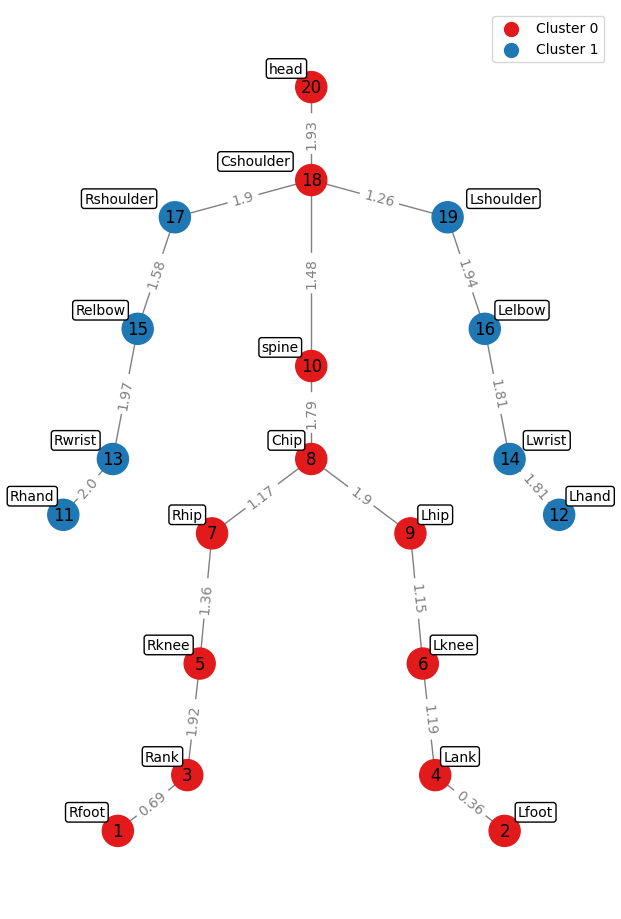

In [160]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import numpy as np

jointsFrom = [1, 3, 5, 7, 2, 4, 6, 9, 8,10,11,13,15,17,12,14,16,19,18]
jointsTo =   [3, 5, 7, 8, 4, 6, 9, 8,10,18,13,15,17,18,14,16,19,18,20]

allNodes = set(jointsFrom).union(set(jointsTo))

jointsFrom = list(map(lambda x: x-1,jointsFrom))
jointsTo = list(map(lambda x: x-1,jointsTo))

if not 'cosineSimVelocity' in locals():
    import pandas as pd
    print("not runned above cells, starting from cached cosine similarity for acceleration")
    featuresTable = pd.read_csv("_cachedCosineSimAcceleration.csv")
else:
    featuresTable = cosineSimVelocity

featuresTableNormalized = featuresTable.div(featuresTable.max(axis=1),axis=0) * 2

timeInstant = 0
weights = np.array(featuresTableNormalized.iloc[timeInstant,:])

adjacencyMatrix = np.zeros((len(allNodes),len(allNodes)))
for from_node, to_node, weight in zip(jointsFrom, jointsTo, weights):
    adjacencyMatrix[to_node, from_node] = weight

num_iteration = 200
predicted_labels = np.zeros(len(allNodes))
for i in range(num_iteration):
    predicted_labels += np.array(shi_malik_spectral_clustering(adjacencyMatrix, 2))
predicted_labels = np.round(predicted_labels / num_iteration).astype(int)
#predicted_labels = normalized_spectral_clustering(adjacencyMatrix,2)

# Create a graph using NetworkX from the adjacency matrix
graph = nx.from_numpy_array(adjacencyMatrix, create_using=nx.Graph)
graph = nx.relabel_nodes(graph, {node: list(allNodes)[i] for i,node in enumerate(graph.nodes())})

# Get edge labels from adjacency matrix (if present)
edge_labels = nx.get_edge_attributes(graph, "weight")
# Clip edge weights to the 2nd decimal place
for edge, weight in edge_labels.items():
    edge_labels[edge] = round(weight, 2)

# You can also create an undirected graph by using create_using=nx.Graph

pos = map_pos_human_body_graph()
# Create the colormap
# Define a pool of colors for k classes (you can add more colors if needed)
color_pool = ['#e31a1c', '#1f78b4', '#33a02c', '#ff7f00', '#6a3d9a', '#b15928']

# Use the color pool to map cluster labels to colors
node_colors = [color_pool[label % len(color_pool)] for label in predicted_labels]

plt.figure(figsize=(6,9))
nx.draw(graph, pos, with_labels=True, node_size=500, node_color=node_colors, edge_color="gray")
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=10, font_color='gray', label_pos=0.5)

# Create a custom legend for cluster labels
unique_labels = np.unique(predicted_labels)

# Create a custom legend for cluster labels using the color pool
legend_labels = {label: f"Cluster {label}" for label in unique_labels}
plt.legend(handles=[plt.scatter([], [], s=100, c=color, marker='o', label=legend_labels[label]) for label, color in zip(unique_labels, color_pool)], loc="upper right")


# Add annotations for joint names
#TODO joints are inverted originally
for node, (x, y) in pos.items():
    plt.text(-x-(np.sign(x) or True)*len(indxToPhys[node])*0.025, y+0.05, indxToPhys[node], fontsize=10, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))


plt.show()

In [142]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import ipywidgets as widgets

%matplotlib inline

def update_graph(time_instant):
    weights = np.array(featuresTableNormalized.iloc[time_instant, :])

    adjacencyMatrix = np.zeros((len(allNodes), len(allNodes)))
    for from_node, to_node, weight in zip(jointsFrom, jointsTo, weights):
        adjacencyMatrix[to_node, from_node] = weight

    predicted_labels = np.zeros(len(allNodes))
    num_iteration = 200
    for i in range(num_iteration):
        predicted_labels += np.array(shi_malik_spectral_clustering(adjacencyMatrix, 2))
    predicted_labels = np.round(predicted_labels / num_iteration).astype(int)

    graph = nx.from_numpy_array(adjacencyMatrix, create_using=nx.Graph)
    graph = nx.relabel_nodes(graph, {node: list(allNodes)[i] for i, node in enumerate(graph.nodes())})

    edge_labels = nx.get_edge_attributes(graph, "weight")
    for edge, weight in edge_labels.items():
        edge_labels[edge] = round(weight, 2)

    pos = map_pos_human_body_graph()

    node_colors = [color_pool[label % len(color_pool)] for label in predicted_labels]

    plt.figure(figsize=(6, 9))
    nx.draw(graph, pos, with_labels=True, node_size=500, node_color=node_colors, edge_color="gray")
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=10, font_color='gray', label_pos=0.5)

    #unique_labels = np.unique(predicted_labels)
    #legend_labels = {label: f"Cluster {label}" for label in unique_labels}
    #plt.legend(handles=[plt.scatter([], [], s=100, c=color, marker='o', label=legend_labels[label])
    #                    for label, color in zip(unique_labels, color_pool)], loc="upper right")

    plt.title(f"Time Instant: {time_instant}")
    plt.show()


time_slider = widgets.IntSlider(min=0, max=(len(featuresTableNormalized) - 1), step=1, value=0, description='Time Instant:')
widgets.interact(update_graph, time_instant=time_slider)

interactive(children=(IntSlider(value=0, description='Time Instant:', max=560), Output()), _dom_classes=('widg…

<function __main__.update_graph(time_instant)>

### Infos about the dataset
```
Video Names Mapping and manual annotation:

Muriel t_003.1 ==> 1 ==> Shoc/Rsho
Muriel t_003.2 ==> 2 ==> Hipc/Head !!
Muriel t_003.3 ==> 3 ==> Rhip/Hipc
Muriel t_004 ==> 4 ==> Shoc/Lsho

Marianne t_002.1 ==> 5 ==> Shoc/Head
Marianne t_002.2 ==> 6 ==> Rknee/Rank
Marianne t_003 ==> 7 ==> Lsho/Shoc
Marianne t_005.1 ==> 8 ==> Rsho/Shoc
Marianne t_005.2 ==> 9 ==> Rank/Hipc !!
Marianne t_012 ==> 10 ==> Shoc/Lsho !!

Cora t_028.1 ==> 11 ==> Rwrist/Rhand
Cora t_028.2 ==> 12 ==> Relb/Head
Cora t_028.3 ==> 13 ==> Lank/Lhip
Cora t_028.4 ==> 14 ==> Lknee/Lhip
Cora t_028.5 ==> 15 ==> Lwrist/Lsho
Cora t_028.6 ==> 16 ==> Hipc/Shoc !!

No OoM.1 (07-07 t_052) ==> 19 ==> No
No OoM.2 (07-07 t_052) ==> 18 ==> No

07-07 t_051 ==> 17 ==> Rknee/Lknee !!
07-07 t_052 ==> 20 ==> Shoc/Hipc !!
07-07 t_060 ==> 21 ==> Rsho/Relb
07-07 t_061 ==> 22 ==> Lelb/Shoc
07-07 t_063 ==> 23 ==> Lelb/Shoc
07-07 t_064 ==> 24 ==> Relb/Rwrist

07-08 t_052_A.1 ==> 25 ==> Lknee/Rknee !!
07-08 t_052_B.1 ==> 26 ==> Lknee/Shoc
07-08 t_052_A.2 ==> 27 ==> Shoc/Lelb
07-08 t_052_B.2 ==> 28 ==> Rknee/Lknee !!
07-08 t_053_A.1 ==> 29 ==> Lknee/Rknee
07-08 t_053_B.1 ==> 30 ==> Rknee/Shoc
07-08 t_053_A.2 ==> 31 ==> Rhip/Shoc
07-08 t_053_B.2 ==> 32 ==> Rknee/Relb

07-13 t_061_A.1 ==> 33 ==> Lelb/Relb
07-13 t_061_B.1 ==> 34 ==> Lknee/Rknee
07-13 t_061_A.2 ==> 35 ==> Rknee/Shoc
07-13 t_061_B.2 ==> 36 ==> Rsho/Relb
```

### Not working when plotting edge weights

In [58]:
%matplotlib

# Create the initial NetworkX graph and other static elements
adjacencyMatrix = np.zeros((len(allNodes), len(allNodes)))
graph = nx.from_numpy_array(adjacencyMatrix, create_using=nx.Graph)
graph = nx.relabel_nodes(graph, {node: list(allNodes)[i] for i, node in enumerate(graph.nodes())})
pos = map_pos_human_body_graph()

# Create the figure and axes
fig = plt.figure(figsize=(6, 9))
ax = fig.add_subplot()
slider_ax = plt.axes([0.2, 0.03, 0.6, 0.03])
time_index = 0
maxValue = len(featuresTableNormalized) - 1

# Create the slider widget
slider = Slider(slider_ax, 'TimeIndex:', 0, maxValue, valinit=time_index, valstep=1)

# Define a function to update the slider value with the mouse wheel
def on_scroll(event):
    if event.button == 'down':
        if slider.val + slider.valstep <= maxValue:
            slider.set_val(slider.val + slider.valstep)
    elif event.button == 'up':
        if slider.val - slider.valstep >= 0:
            slider.set_val(slider.val - slider.valstep)

# Connect the mouse wheel event to the function
fig.canvas.mpl_connect('scroll_event', on_scroll)

# Custom legend for cluster labels
unique_labels = np.unique(predicted_labels)
legend_labels = {label: f"Cluster {label}" for label in unique_labels}

# Define the update_graph function
def update_graph(time_instant):
    ax.clear()  # Clear the previous plot

    weights = np.array(featuresTableNormalized.iloc[time_instant, :])

    adjacencyMatrix = np.zeros((len(allNodes), len(allNodes)))
    for from_node, to_node, weight in zip(jointsFrom, jointsTo, weights):
        adjacencyMatrix[to_node, from_node] = weight

    predicted_labels = np.zeros(len(allNodes))
    for i in range(num_iteration):
        predicted_labels += np.array(shi_malik_spectral_clustering(adjacencyMatrix, 2))
    predicted_labels = np.round(predicted_labels / num_iteration).astype(int)

    # Update the existing NetworkX graph or create new one if not present
    for from_node, to_node, weight in zip(jointsFrom, jointsTo, weights):
        if graph.has_edge(from_node, to_node):
            graph[from_node][to_node]['weight'] = weight

    edge_labels = nx.get_edge_attributes(graph, "weight")
    for edge, weight in edge_labels.items():
        edge_labels[edge] = round(weight, 2)  # Round the edge weights to two decimal places

    node_colors = [color_pool[label % len(color_pool)] for label in predicted_labels]

    # Draw the graph with custom positions (pos)
    nx.draw(graph, pos, with_labels=True, node_size=500, node_color=node_colors, edge_color="gray", ax=ax)

    # Draw the edge labels explicitly using the same custom positions (pos)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=20, font_color='gray', ax=ax, label_pos=0.5, rotate=False)

    ax.legend(handles=[plt.scatter([], [], s=100, c=color, marker='o', label=legend_labels[label])
                        for label, color in zip(unique_labels, color_pool)], loc="upper right")

    plt.title(f"Time Instant: {time_instant}")
    fig.canvas.draw_idle()

# Register the update_plot function with the slider widget
slider.on_changed(update_graph)

# Initial plot
update_graph(time_index)

plt.show()


Using matplotlib backend: TkAgg


### Simple Spectral Clustering on a Graph

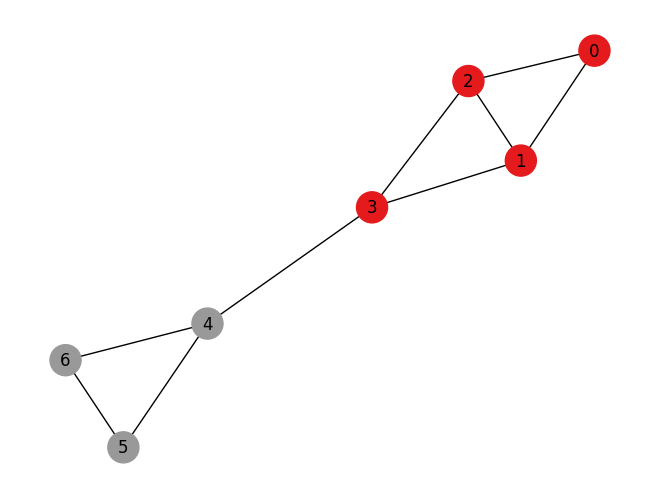

In [32]:
import numpy as np
import networkx as nx
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

# Step 1: Build the Graph
# You can either create the graph manually or load it from your data source.
# For this example, let's create a simple graph.

# Define the edges of the graph (you can adjust these based on your data)
edges = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (4, 6), (5, 6)]

# Create an undirected graph
G = nx.Graph()
G.add_edges_from(edges)

# Step 2: Construct the Affinity Matrix
# We'll use the adjacency matrix as the affinity matrix for this example.

# Get the adjacency matrix as a numpy array
adjacency_matrix = nx.to_numpy_array(G)

# Step 3: Compute the Laplacian Matrix
# We'll use the normalized Laplacian for this example.

# Compute the degree matrix (sum of the weights of each node's edges)
degree_matrix = np.diag(np.sum(adjacency_matrix, axis=1))

# Compute the Laplacian matrix
laplacian_matrix = degree_matrix - adjacency_matrix

# Step 4: Compute Eigenvalues and Eigenvectors
# Use numpy's linalg.eig function to compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(laplacian_matrix)

# Step 5: Form a New Feature Representation
# We'll use the first k eigenvectors as our new feature representation.
# Choose the number of clusters (k) you want to identify.
k = 2
idx = np.argsort(eigenvalues)[0:k]
new_features = eigenvectors[:, idx]

# Step 6: Clustering
# Use k-means clustering on the new feature representation
spectral_clustering = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', n_neighbors=4, assign_labels='kmeans')
predicted_labels = spectral_clustering.fit_predict(new_features)

# Plot the graph with node colors based on the clustering result
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=predicted_labels, cmap=plt.cm.Set1, node_size=500)
plt.show()


### Comparison between Shi and Malik - Normalized Spectral Clustering

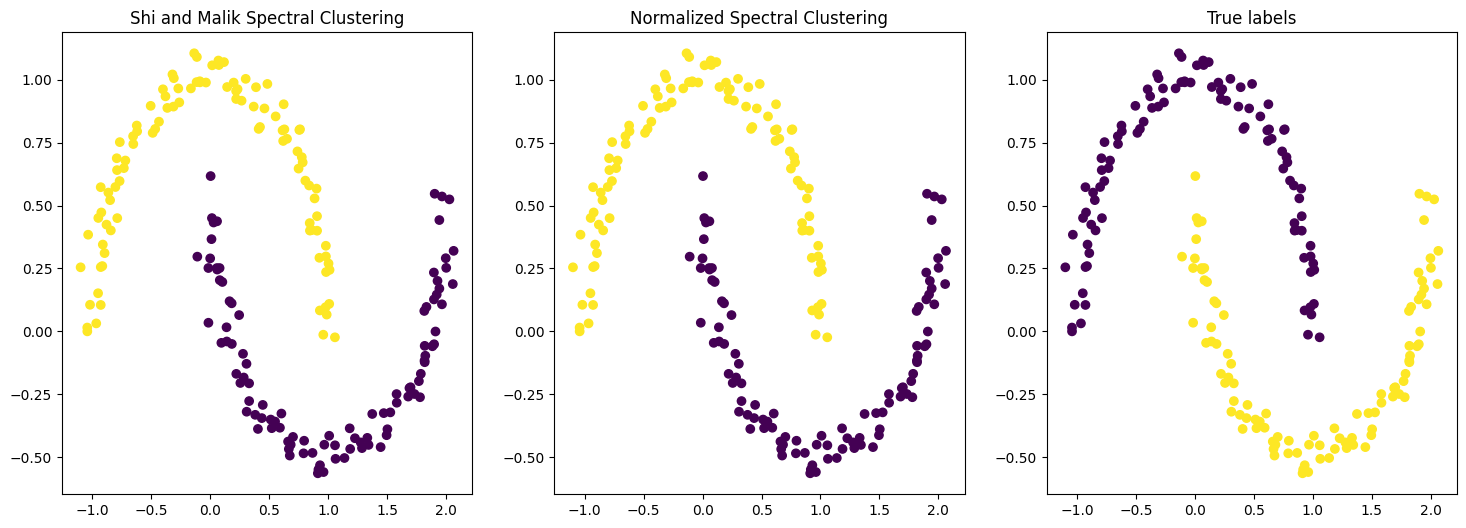

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import KMeans
from scipy.sparse.linalg import eigs

# Generate a synthetic dataset (two moons)
X, y = make_moons(n_samples=200, noise=0.05, random_state=42)

# Create a similarity graph using k-nearest neighbors
graph = kneighbors_graph(X, n_neighbors=10, mode='connectivity', include_self=True)

# Spectral clustering using Shi and Malik algorithm
def shi_malik_spectral_clustering(graph, n_clusters):
    # Compute the graph Laplacian matrix
    laplacian_matrix = graph - np.diag(np.array(graph.sum(axis=1)).flatten())

    # Compute the first n_clusters eigenvectors of the Laplacian matrix
    _, eigenvectors = eigs(laplacian_matrix, k=n_clusters, which='SM')

    # Use K-means to cluster the eigenvectors
    kmeans = KMeans(n_clusters=n_clusters,random_state=42)
    kmeans.fit(eigenvectors.real)
    return kmeans.labels_

# Spectral clustering using normalized spectral clustering (Ng-Jordan-Weiss)
def normalized_spectral_clustering(graph, n_clusters):
    # Compute the graph Laplacian matrix
    laplacian_matrix = graph - np.diag(np.array(graph.sum(axis=1)).flatten())

    # Compute the normalized Laplacian matrix
    normalized_laplacian = np.linalg.inv(np.diag(np.array(graph.sum(axis=1)).flatten())) @ laplacian_matrix

    # Compute the first n_clusters eigenvectors of the normalized Laplacian matrix
    _, eigenvectors = eigs(normalized_laplacian, k=n_clusters + 1, which='SM')

    # Use K-means to cluster the eigenvectors
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(eigenvectors[:, 1:].real)
    return kmeans.labels_

# Number of clusters (we know it's 2 for this dataset)
n_clusters = 2

# Perform Shi and Malik spectral clustering
shi_malik_labels = shi_malik_spectral_clustering(graph, n_clusters)

# Perform normalized spectral clustering (Ng-Jordan-Weiss)
normalized_labels = normalized_spectral_clustering(graph, n_clusters)

# Visualize the results
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=shi_malik_labels, cmap='viridis')
plt.title('Shi and Malik Spectral Clustering')
plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=normalized_labels, cmap='viridis')
plt.title('Normalized Spectral Clustering')
plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('True labels')
plt.show()


## Shapley

### Reproducing second case in 'Vizialization_Shepley_with_spectral_clustering_GG.m'

In [78]:
shapleys = pd.DataFrame(columns=['firstMaxValue','firstIndex','secondMaxValue','secondIndex']).astype({ 'firstMaxValue': float,
                                                                                                        'firstIndex': int,
                                                                                                        'secondMaxValue': float,
                                                                                                        'secondIndex': int
                                                                                                    })
shapleys['firstMaxValue'] = featuresTableNormalized.max(axis=1)
shapleys['firstIndex'] = [int(featuresTableNormalized.columns.get_loc(row)) for row in featuresTableNormalized.idxmax(axis=1)]

# set max values cells to -inf 
tableWithoutFirstMax = featuresTableNormalized.copy()
for i,shap_row in shapleys.iterrows():
    tableWithoutFirstMax.iloc[i, int(shap_row['firstIndex'])] = float('-inf') 

shapleys['secondMaxValue'] = tableWithoutFirstMax.max(axis=1)
shapleys['secondIndex'] = [tableWithoutFirstMax.columns.get_loc(row) for row in tableWithoutFirstMax.idxmax(axis=1)]

print(shapleys)

     firstMaxValue  firstIndex  secondMaxValue  secondIndex
0              2.0          13        1.996316            1
1              2.0           1        1.997122           13
2              2.0          13        1.981765           17
3              2.0          13        1.988791           17
4              2.0          13        1.999259            9
..             ...         ...             ...          ...
572            2.0          17        1.997838           13
573            2.0          17        1.996498           13
574            2.0          17        1.995206           13
575            2.0          17        1.994868           13
576            2.0          17        1.994858           13

[577 rows x 4 columns]


### Reproducing third case

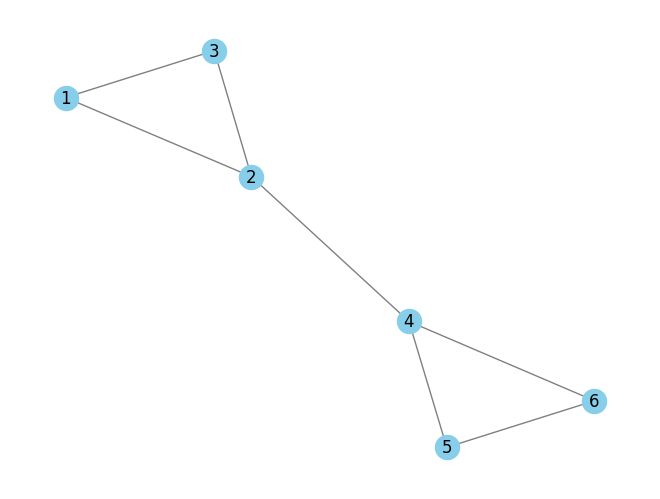

Nodes in the connected subgraph: [1, 2, 3, 4, 5, 6]
Edges in the connected subgraph: [(1, 2), (1, 3), (2, 3), (2, 4), (4, 5), (4, 6), (5, 6)]


In [85]:
import networkx as nx

# Create an example graph (replace this with your actual graph)
# For this example, we'll use an undirected graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (4, 5),(5,6),(6,4)])
nx.draw(G,with_labels=True,node_color="skyblue", edge_color="gray")
plt.show()

# Function to generate the connected subgraph from a given graph
def generate_connected_subgraph(graph, start_node):
    visited_nodes = set()
    queue = [start_node]
    while queue:
        node = queue.pop(0)
        if node not in visited_nodes:
            visited_nodes.add(node)
            neighbors = list(graph.neighbors(node))
            queue.extend(neighbors)
    subgraph_nodes = visited_nodes
    subgraph = graph.subgraph(subgraph_nodes)
    return subgraph

# Call the function with the start_node you want to begin the connected subgraph from
start_node = 1  # Replace this with the desired starting node
connected_subgraph = generate_connected_subgraph(G, start_node)

# Print the nodes and edges of the connected subgraph
print("Nodes in the connected subgraph:", connected_subgraph.nodes())
print("Edges in the connected subgraph:", connected_subgraph.edges())


# NOT WORKING

## From processed
Are these speed and acceleration values? why are they 20 cols and not 60 (20 markers x 3 dims) ? Are these magnitudes?

In [46]:
# Questo non ha senso
DATA_POSITION_PATH = "data/derivated_orig/07-07/t_051/t_051_ACCELERATION.txt"
table = pd.read_table(DATA_POSITION_PATH,header=None,sep=' ')
#needRotation = True
table.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.00,0.003027,0.001672,0.000601,-0.000017,-0.000013,0.000750,0.002242,0.004252,0.006413,...,-0.002697,-0.002618,-0.001668,-0.000226,0.001307,0.002535,0.003224,0.003379,0.003112,0.002578
1,0.01,0.005455,0.003104,0.001259,0.000219,0.000280,0.001689,0.004388,0.007996,0.011840,...,-0.005426,-0.005077,-0.003000,0.000119,0.003537,0.006486,0.008437,0.009250,0.009030,0.008120
2,0.02,0.008882,0.005397,0.002703,0.001269,0.001563,0.003981,0.008426,0.014264,0.020360,...,-0.010984,-0.009786,-0.005258,0.001468,0.009127,0.016302,0.021794,0.024903,0.025494,0.024317
3,0.03,0.009054,0.006258,0.004175,0.003249,0.003956,0.006689,0.011337,0.017215,0.023078,...,-0.016168,-0.013854,-0.007000,0.003156,0.015157,0.027187,0.037351,0.044079,0.046711,0.046378
4,0.04,0.005969,0.005397,0.005106,0.005333,0.006409,0.008588,0.011757,0.015389,0.018543,...,-0.019358,-0.016389,-0.008284,0.003837,0.018590,0.034063,0.047932,0.057983,0.063147,0.064739


## From raw

In [42]:
import pandas as pd

DATA_RAW_PATH = "data/raw/"
MURIEL_RAW = DATA_RAW_PATH+"muriel/"
MARIANNE_RAW = DATA_RAW_PATH+"marianne/"
CORA_RAW = DATA_RAW_PATH+"cora/"
JUL_SEV_RAW = DATA_RAW_PATH+"07-07/"
JUL_EI_RAW = DATA_RAW_PATH+"07-08/"
JUL_THI_RAW = DATA_RAW_PATH+"07-13/"

drive_raw_map = {   1:  (MURIEL_RAW+"t_003.tsv",(37,40)),
                    2:  (MURIEL_RAW+"t_003.tsv",(58,64)),
                    3:  (MURIEL_RAW+"t_003.tsv",(73,76)),
                    4:  (MURIEL_RAW+"t_004.tsv",(13,16)),
                    5:  (MARIANNE_RAW+"t_002.tsv",(36.3,41.5)),
                    6:  (MARIANNE_RAW+"t_002.tsv",(44.4,50)),
                    7:  (MARIANNE_RAW+"t_003.tsv",(3,8.9)),
                    8:  (MARIANNE_RAW+"t_005.tsv",(4,9)),
                    9:  (MARIANNE_RAW+"t_005.tsv",(9.2,13.4)),
                    10: (MARIANNE_RAW+"t_012.tsv",(14,20.1)),
                    11: (CORA_RAW+"t_028.tsv",(4.7,8.3)),
                    12: (CORA_RAW+"t_028.tsv",(12.8,18.5)),
                    13: (CORA_RAW+"t_028.tsv",(24.2,29.7)),
                    14: (CORA_RAW+"t_028.tsv",(29.8,36.2)),
                    15: (CORA_RAW+"t_028.tsv",(51.1,55)),
                    16: (CORA_RAW+"t_028.tsv",(57.9,63.8)),
                    17: (JUL_SEV_RAW+"t_051.tsv",(16.9,18.7)),
                    18: (JUL_SEV_RAW+"t_052.tsv",(11.5,13.2)),
                    19: (JUL_SEV_RAW+"t_052.tsv",(15,18)),
                    20: (JUL_SEV_RAW+"t_052.tsv",(19,21.5)),
                    21: (JUL_SEV_RAW+"t_060.tsv",(2,5)),
                    22: (JUL_SEV_RAW+"t_061.tsv",(58,61)),
                    23: (JUL_SEV_RAW+"t_063.tsv",(25.5,28.5)),    
                    24: (JUL_SEV_RAW+"t_064.tsv",(2.5,5.5)),    
                    25: (JUL_EI_RAW+"t_052.tsv",(8.1,11.8)),    # A   
                    26: (JUL_EI_RAW+"t_052.tsv",(11.8,15.1)),   # B   
                    27: (JUL_EI_RAW+"t_052.tsv",(12.15,14.7)),  # A         
                    28: (JUL_EI_RAW+"t_052.tsv",(8.5,11.8)),    # B       
                    29: (JUL_EI_RAW+"t_053.tsv",(22,24.5)),     # A  
                    30: (JUL_EI_RAW+"t_053.tsv",(22,24.5)),     # B      
                    31: (JUL_EI_RAW+"t_053.tsv",(25,27.2)),     # A     
                    32: (JUL_EI_RAW+"t_053.tsv",(25,27.2)),     # B   
                    33: (JUL_THI_RAW+"t_061.tsv",(29,32.1)), # A      
                    34: (JUL_THI_RAW+"t_061.tsv",(29,32.1)), # B       
                    35: (JUL_THI_RAW+"t_061.tsv",(74,80)),   # A 
                    36: (JUL_THI_RAW+"t_061.tsv",(74,80))    # B      
                    }


data = pd.read_csv(drive_raw_map[1][0], sep='\t',skiprows=10,low_memory=False)
data.head()

,Frame,Time,SMPTE,ARIEL X,ARIEL Y,ARIEL Z,LFHD X,LFHD Y,LFHD Z,RFHD X,...,RBHD X,RBHD Y,RBHD Z,LBHD X,LBHD Y,LBHD Z,LPLM X,LPLM Y,LPLM Z,Unnamed: 189
0,1,0.00000,00:34:38.17:01,915.832,1636.494,-102.556,860.323,1594.619,-35.402,877.048,...,978.740,1481.155,-155.687,975.891,1501.635,-14.070,962.765,1354.705,679.482,NaN
1,2,0.01042,00:34:38.17:02,915.833,1636.502,-102.572,860.359,1594.634,-35.406,877.051,...,978.740,1481.176,-155.698,975.945,1501.673,-14.085,962.826,1354.702,679.471,NaN
2,3,0.02083,00:34:38.17:03,915.849,1636.510,-102.606,860.385,1594.632,-35.414,877.072,...,978.776,1481.168,-155.703,975.970,1501.698,-14.092,962.879,1354.709,679.464,NaN
3,4,0.03125,00:34:38.18:00,915.765,1636.592,-102.680,860.628,1594.947,-35.348,877.593,...,979.312,1480.932,-155.603,976.193,1502.154,-14.207,962.849,1354.905,679.555,NaN
4,5,0.04167,00:34:38.18:01,915.807,1636.588,-102.680,860.487,1594.766,-35.691,877.511,...,979.331,1480.824,-155.588,976.034,1502.055,-14.083,962.898,1354.968,679.470,NaN


In [43]:
data = data.iloc[:,3:]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14770 entries, 0 to 14769
Columns: 187 entries, ARIEL X to Unnamed: 189
dtypes: float64(130), object(57)
memory usage: 21.1+ MB


## From processed split
BAD LOOKING SHAPES...

In [44]:
import pandas as pd

DATA_PROCESSED_PATH = "data/processed/"
MURIEL_PROCESSED = DATA_PROCESSED_PATH+"muriel/"
MARIANNE_PROCESSED = DATA_PROCESSED_PATH+"marianne/"
CORA_PROCESSED = DATA_PROCESSED_PATH+"cora/"
JUL_SEV_PROCESSED = DATA_PROCESSED_PATH+"07-07/"
JUL_EI_PROCESSED = DATA_PROCESSED_PATH+"07-08/"
JUL_THI_PROCESSED = DATA_PROCESSED_PATH+"07-13/"

drive_processed_map = { 1:  (MURIEL_PROCESSED+"t_003/t_003",(37,40)),
                        2:  (MURIEL_PROCESSED+"t_003/t_003",(58,64)),
                        3:  (MURIEL_PROCESSED+"t_003/t_003",(73,76)),
                        4:  (MURIEL_PROCESSED+"t_004/t_004",(13,16)),
                        5:  (MARIANNE_PROCESSED+"t_002/t_002",(36.3,41.5)),
                        6:  (MARIANNE_PROCESSED+"t_002/t_002",(44.4,50)),
                        7:  (MARIANNE_PROCESSED+"t_003/t_003",(3,8.9)),
                        8:  (MARIANNE_PROCESSED+"t_005/t_005",(4,9)),
                        9:  (MARIANNE_PROCESSED+"t_005/t_005",(9.2,13.4)),
                        10: (MARIANNE_PROCESSED+"t_012/t_012",(14,20.1)),
                        11: (CORA_PROCESSED+"t_028",(4.7,8.3)),
                        12: (CORA_PROCESSED+"t_028",(12.8,18.5)),
                        13: (CORA_PROCESSED+"t_028",(24.2,29.7)),
                        14: (CORA_PROCESSED+"t_028",(29.8,36.2)),
                        15: (CORA_PROCESSED+"t_028",(51.1,55)),
                        16: (CORA_PROCESSED+"t_028",(57.9,63.8)),
                        17: (JUL_SEV_PROCESSED+"t_051/t_051",(16.9,18.7)),
                        18: (JUL_SEV_PROCESSED+"t_052/t_052",(11.5,13.2)),
                        19: (JUL_SEV_PROCESSED+"t_052/t_052",(15,18)),
                        20: (JUL_SEV_PROCESSED+"t_052/t_052",(19,21.5)),
                        21: (JUL_SEV_PROCESSED+"t_060/t_060",(2,5)),
                        22: (JUL_SEV_PROCESSED+"t_061/t_061",(58,61)),
                        23: (JUL_SEV_PROCESSED+"t_063/t_063",(25.5,28.5)),
                        24: (JUL_SEV_PROCESSED+"t_064/t_064",(2.5,5.5)),
                        25: (JUL_EI_PROCESSED+"t_052/A/t_052_A",(8.1,11.8)),       
                        26: (JUL_EI_PROCESSED+"t_052/B/t_052_B",(11.8,15.1)),      
                        27: (JUL_EI_PROCESSED+"t_052/A/t_052_A",(12.15,14.7)),     
                        28: (JUL_EI_PROCESSED+"t_052/B/t_052_B",(8.5,11.8)),       
                        29: (JUL_EI_PROCESSED+"t_053/A/t_053_A",(22,24.5)),
                        30: (JUL_EI_PROCESSED+"t_053/B/t_053_B",(22,24.5)),        
                        31: (JUL_EI_PROCESSED+"t_053/A/t_053_A",(25,27.2)),        
                        32: (JUL_EI_PROCESSED+"t_053/B/t_053_B",(25,27.2)),        
                        33: (JUL_THI_PROCESSED+"t_061/A/t_061_A",(29,32.1)),       
                        34: (JUL_THI_PROCESSED+"t_061/B/t_061_B",(29,32.1)),        
                        35: (JUL_THI_PROCESSED+"t_061/A/t_061_A",(74,80)),
                        36: (JUL_THI_PROCESSED+"t_061/B/t_061_B",(74,80))         
                    }


tableX = pd.DataFrame()
tableY = pd.DataFrame()
tableZ = pd.DataFrame()

dtypes = {'X': float, 'Y': float, 'Z': float}

for i in range(1,21):
    data = pd.read_csv(drive_processed_map[1][0]+"_split_"+str(i)+"_out.txt",skiprows=1,sep=',',header=None,dtype=dtypes)
    tableX = pd.concat([tableX,data[0]],axis=1)
    tableY = pd.concat([tableY,data[1]],axis=1)
    tableZ = pd.concat([tableZ,data[2]],axis=1)
tableX.head()
#table = data
print(tableX.info())
print(tableY.info())
print(tableZ.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14770 entries, 0 to 14769
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       14770 non-null  float64
 1   0       14770 non-null  float64
 2   0       14770 non-null  float64
 3   0       14770 non-null  float64
 4   0       14770 non-null  float64
 5   0       14770 non-null  float64
 6   0       14770 non-null  float64
 7   0       14770 non-null  float64
 8   0       14770 non-null  float64
 9   0       14770 non-null  float64
 10  0       14770 non-null  float64
 11  0       14770 non-null  float64
 12  0       14770 non-null  float64
 13  0       14770 non-null  float64
 14  0       14770 non-null  float64
 15  0       14770 non-null  float64
 16  0       14770 non-null  float64
 17  0       14770 non-null  float64
 18  0       14770 non-null  float64
 19  0       14770 non-null  float64
dtypes: float64(20)
memory usage: 2.3 MB
None
<class 'pandas.core.frame.DataF

In [45]:
from matplotlib import pyplot as plt
%matplotlib
from matplotlib.widgets import Slider
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


plt.close("all")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#tableNoTime = table.iloc[:,1:]
#timeCol = table.iloc[:,0]
#if needRotation:
#    tableX = tableNoTime.iloc[:,::3]
#    tableZ = tableNoTime.iloc[:,1::3]
#    tableY = tableNoTime.iloc[:,2::3]
#else:
#    tableX = tableNoTime.iloc[:,::3]
#    tableY = tableNoTime.iloc[:,1::3]
#    tableZ = tableNoTime.iloc[:,2::3]

#theta = np.pi/2  # 90 degrees in radians
#R = np.array([[np.cos(theta), -np.sin(theta), 0],
#              [np.sin(theta), np.cos(theta), 0],
#              [0, 0, 1]])
#
#for i in range(len(tableX)):
#    # Apply the rotation matrix to the data
#    data_st = np.vstack([tableX[i,:], tableY[i,:], tableZ[i,:]])
#    data_rotated = np.dot(data_st, R)
#    tableX[i,:]=data_rotated[0,:]
#    tableY[i,:]=data_rotated[1,:]
#    tableZ[i,:]=data_rotated[2,:]    
#tableX = data_rotated[:,0]
#tableY = data_rotated[:,1]
#tableZ = data_rotated[:,2]

minMax = np.zeros((2,3))
minMax[0,:] = [tableX.values.min(),tableY.values.min(),tableZ.values.min()]
minMax[1,:] = [tableX.values.max(),tableY.values.max(),tableZ.values.max()]

print(minMax)

# Set appropriate axis limits
ax.set_xlim([minMax[0,0],minMax[1,0]])
ax.set_ylim([minMax[0,1],minMax[1,1]])
ax.set_zlim([minMax[0,2],minMax[1,2]])

# Set the initial time index
time_index = 0

# Function to update the plot based on the slider value
def update_plot(val):
    ax.cla()  # Clear the previous plot
    
    # Filter the data based on the current time index
    filteredX = tableX.iloc[val]
    filteredY = tableY.iloc[val]
    filteredZ = tableZ.iloc[val]
    
    ax.scatter(filteredX,filteredY,filteredZ)

    ax.set_xlim([minMax[0,0],minMax[1,0]])
    ax.set_ylim([minMax[0,1],minMax[1,1]])
    ax.set_zlim([minMax[0,2],minMax[1,2]])
    
    ax.set_xlabel('X', fontsize=12)
    ax.set_ylabel('Y', fontsize=12)
    ax.set_zlabel('Z', fontsize=12)
    ax.set_title('3D Movement')

    fig.canvas.draw_idle()

# Create a slider widget
slider_ax = plt.axes([0.2, 0.03, 0.6, 0.03])
slider = Slider(slider_ax, 'TimeIndex', 0, tableX.shape[0]-1, valinit=time_index, valstep=1)

# Register the update_plot function with the slider widget
slider.on_changed(update_plot)

# Initial plot
update_plot(time_index)

# Show the plot
plt.show()


Using matplotlib backend: TkAgg
[[-0.09629714 -0.0039084  -0.89798571]
 [ 1.69142434  2.0124404   2.4209322 ]]
